# Задача №3


Условие - https://drive.google.com/drive/u/0/folders/12SmLUGDcKMPgJjaX1l0-VHXPug5IS7mf


In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from scipy.special import factorial
import warnings
from scipy.integrate import quad as integral

N=10000
SAMPLE_COUNT=100



Для начала посмотрим, а нельзя ли "на глаз" подтвердить гипотезу или опровергнуть

Давайте построим гистограмму данной выборки из условия и нанесём на график плотности распределений.


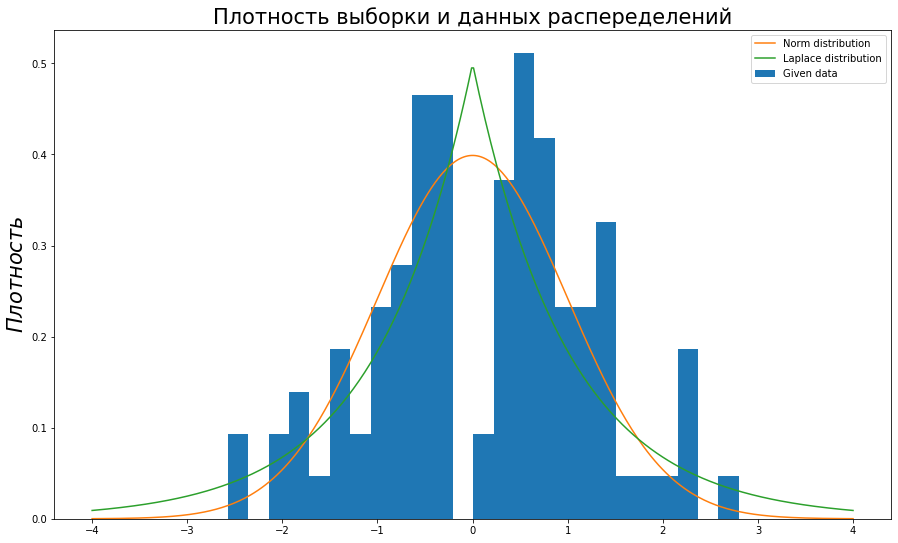

In [113]:
plt.figure(figsize=(15, 9))

data = np.load('9-3.npy')
plt.hist(data, density=True, bins=25, label='Given data')

x = np.linspace(-4, 4, 400)
y = sps.norm.pdf(x)
plt.plot(x, y, label='Norm distribution')

y = sps.laplace.pdf(x)
plt.plot(x, y, label='Laplace distribution')

plt.title('Плотность выборки и данных распеределений', fontsize=21)
plt.ylabel('$Плотность$', fontsize=21)
plt.legend()
plt.show()


Сходу нельзя определить к какому распределению тяготеет наша выборка, поэтому давайте использовать предлагаемые в задаче методы.


Сформируем параметры из экпоненциального распределения, N=10000


In [114]:
params = sps.expon(1).rvs(size=N)


Напишем функции, вычисляющие наши интегралы из формулы, где:

$f_0=e^{-\frac{\sum_{i=1}^n X_i^2}{2 \sigma^2}}(\frac{1}{\sqrt{2 \pi \sigma^2}})^n, \space  f_1=e^{-\frac{\sum_{i=1}^n |X_i|}{\theta}} (\frac{1}{2 \theta})^n $

$q(\sigma)=e^{-\sigma} I(\sigma > 0)d\sigma, \space \widetilde{q}(\theta)=e^{-\theta} I(\theta > 0)d\theta$


In [115]:
def int0(array):
    f0 = lambda sigma, sample : ((1 / (2 * np.pi * (sigma ** 2))) ** 0.5) ** len(sample) * np.exp(-np.sum(sample ** 2) /
                                                                           (2 * (sigma ** 2))) * np.exp(-sigma)
    
    return integral(f0, 0, np.inf, (array,))[0]

def int1(array):
    f1 = lambda theta, sample : (1 / (2 * theta)) ** len(sample) * \
           np.exp(-np.sum(np.abs(sample)) / theta) * np.exp(-theta)

    return integral(f1, 0, np.inf, (array,))[0]


Для каждого параметра генерируем выборку из нормального распределения и смотрим нашу статистику на этой выборке


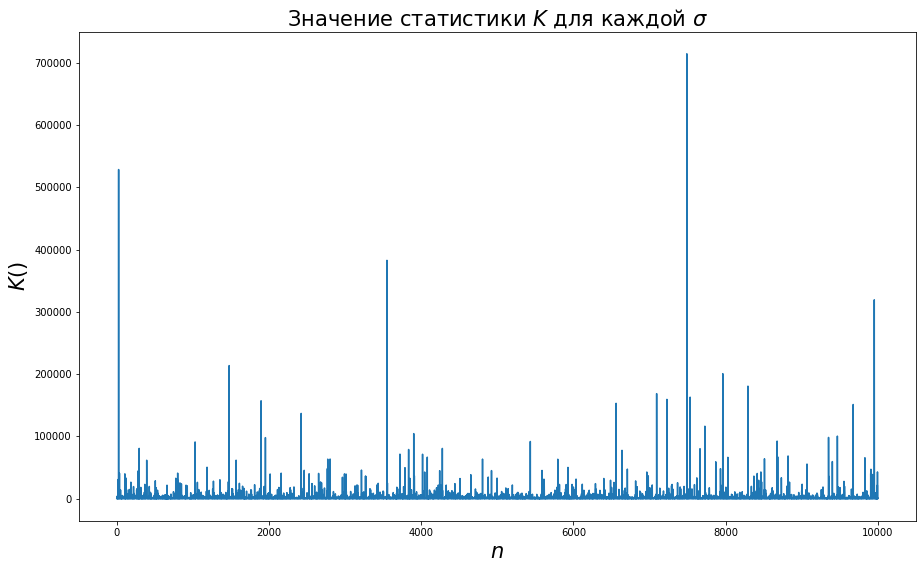

In [116]:
K_statistic = np.zeros(N)
for i, sigma in enumerate(params):
    sample = sps.norm(loc=0, scale=sigma**0.5).rvs(SAMPLE_COUNT)
    K_statistic[i] = int0(sample) / int1(sample)
    
plt.figure(figsize=(15, 9))
plt.title('Значение статистики $K$ для каждой $\sigma$', fontsize=21)
plt.xlabel('$n$', fontsize=21)
plt.ylabel('$K()$', fontsize=21)
plt.plot(np.arange(N), K_statistic)


Давайте построим критерий для проверки гипотезы с уровнем 0.05. Т.е. нам нужно подобрать такой $x$, что
$P(K \leq x) = 0.05$ если верна $H_0.$ Если выборка размера N, то $x$ должно быть $N * 0.05$-ое по порядку значение нашей статистики.
Тогда отсортируем "выхлоп" нашей статистики и посмотрим на $N * 0.05$-ый элемент в эмперическом распределении данной статистики.


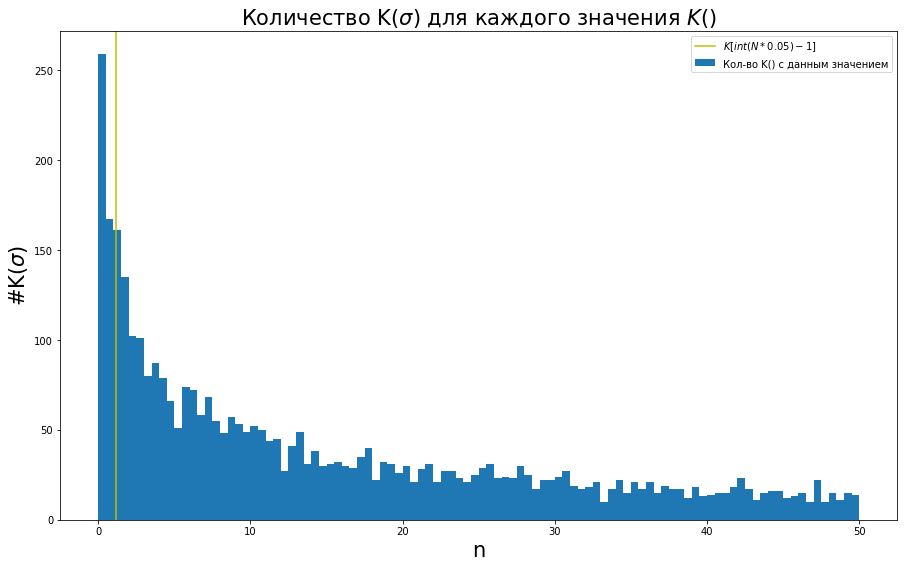

K_statistic[int(N * 0.05) - 1] =  1.1971396878292462


In [118]:

K_statistic = sorted(K_statistic)

plt.figure(figsize=(15, 9))
plt.hist(K_statistic, bins=SAMPLE_COUNT, range=(0, 50), label='Кол-во K() с данным значением')
plt.axvline(K_statistic[int(N * 0.05) - 1], color='y', label='$K[int(N * 0.05) - 1]$')

plt.title('Количество K($\sigma$) для каждого значения $K()$', fontsize=21)
plt.xlabel('n', fontsize=21)
plt.ylabel('#K($\sigma$)', fontsize=21)
plt.legend()
plt.show()
print('K_statistic[int(N * 0.05) - 1] =', K_statistic[int(N * 0.05) - 1])


То есть критерий выглядит таким образом $\{K\leq\ K[int(N * 0.05) - 1]\}$

В моём случае $K[int(N * 0.05) - 1] = 1,1468$

Посчитаем статистику на данной из условия выборки.

In [119]:
data_K_statistic = int0(data) / int1(data)
print('K_from_data = %s' % data_K_statistic)


K_from_data = 14311.948632273956


Как мы видим, статистика, посчитанная на данных очень большая и далеко от границы нашего критерия, поэтому
мы принимаем гипотезу $H_0$